In [40]:

"""
N = compute_normals(data, L)
In:
− `data` `m × n × d` matrix whose `d` slices contain `m × n` images
of a common scene under different lighting conditions
− `L` `3 × d` matrix whose columns are the lighting direction vectors
for the images in data, with `d   3`
Out:
− `N` `m × n × 3` matrix containing the unit−norm surface normal vectors
for each pixel in the scene
"""
function compute_normals(data, L)
    
    m, n, d= size(data) 
    data =reshape(data, m * n, d) # data become (m*n) * d matrix 
    
    L = mapslices(normalize, L, dims=1) #norm vectors of lighting direction
    
    N = data * pinv(L)
    N = reshape(N, m, n, 3)
    N = mapslices(normalize, N, dims = 3)  #unit-norm surface normal vectors for each pixel in a scene
    
    return N
    
end 


compute_normals

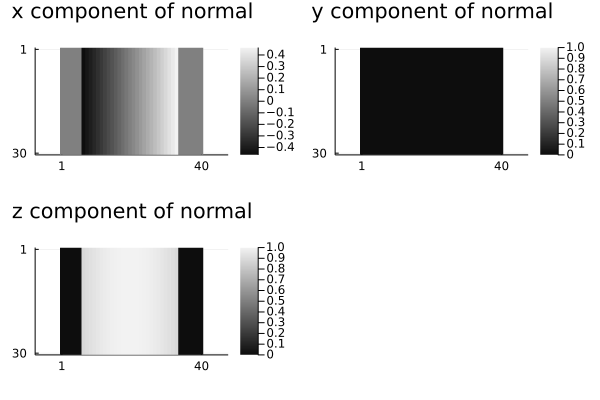

In [41]:

using MIRTjim: jim
d = 8 # number of test images
phi = LinRange(-1,1,8)*pi/3 # light angles
L = [sin.(phi) 0*cos.(phi) cos.(phi)]' # light unit vectors
m,n = 40,30 # image size
x0 = m/2 # cylinder center coordinate
r0 = 0.7m # cylinder radius
afun = (x,y) -> abs(x-x0) < r0/2 # albedo alpha(x,y)
zfun = x -> abs(x) < r0 ? sqrt(r0^2 - x^2) : 0 # cylinder surface
normal = (x,y) -> [(x-x0)/r0, 0, zfun(x-x0)/r0] # surface normal
ntrue = [normal(x,y)*afun(x,y) for x in 1:m, y in 1:n]
ntrue = cat([map(x -> x[i], ntrue) for i=1:3]..., dims=3) # m × n × 3
data = zeros(Float32, m, n, d)
for l=1:d
data[:,:,l] .= [L[:,l]'normal(x,y)*afun(x,y) for x in 1:m, y in 1:n]
end
jim(data, "$d images for different light positions")
nhat = compute_normals(data, L)
nhat[isnan.(nhat)] .= 0
jim(cat(ntrue, nhat, nhat-ntrue, dims=4), "true and estimated normals and error")
plot(
jim(nhat[:,:,1], "x component of normal"),
jim(nhat[:,:,2], "y component of normal"),
jim(nhat[:,:,3], "z component of normal"),
) 
# savefig("hp073.pdf")

In [38]:
using LinearAlgebra
using Plots